# App code for the water-consumption model

This notebook explores Python code for more than just testing our water-consumption Visual Recognition model.  This notebook prototypes code for processing webcam images and sending them to the Visual Recognition model.  Prototyping code here can make creating a web app later easier.

- Step 1: Install and import required libraries
- Step 2: Download sample webcam images
- Step 3: Crop and resize images
- Step 4: Classify the cropped and resized images


## Step 1: Install and import required libraries

- [wget](https://pypi.org/project/wget/) for downloading sample webcam images to the notebook working directory
- [Pillow](https://pillow.readthedocs.io/en/5.3.x/reference/Image.html) for cropping and resizing the webcam imgages
- watson_developer_cloud for working with [Watson Visual Recognition API](https://www.ibm.com/watson/developercloud/visual-recognition/api/v3/python.html?python)

In [ ]:
!pip install --upgrade wget

In [ ]:
!pip install --upgrade watson-developer-cloud

In [18]:
import wget
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from watson_developer_cloud import VisualRecognitionV3
import json

## Step 2: Download sample webcam images

All material for the CASCON 2018 workshop "Building AI models using Watson Studio" is stored in GitHub: [CASCON-2018_Analyzing_images](https://github.com/spackows/CASCON-2018_Analyzing_images)

To work with sample webcam images, use wget to download the images directly from GitHub to the notebook working directory.

In [94]:
!rm -f *.JPG
!rm -f *.jpg

filenames = [
'IMG_0062_donkeyday.JPG',
'IMG_0191_ponyday.JPG',
'IMG_1534_bellonight.JPG',
'IMG_1670_shortynight.JPG'
]

url_base = 'https://github.com/spackows/CASCON-2018_Analyzing_images/raw/master/water-consumption/sample-webcam-images/'

for i in range(4):
    wget.download( url_base + filenames[i] )

!ls -l

total 6840
-rw-r--r-- 1 spark spark 1922753 Oct 18 23:02 IMG_0062_donkeyday.JPG
-rw-r--r-- 1 spark spark 1917760 Oct 18 23:02 IMG_0191_ponyday.JPG
-rw-r--r-- 1 spark spark 1563866 Oct 18 23:02 IMG_1534_bellonight.JPG
-rw-r--r-- 1 spark spark 1545453 Oct 18 23:02 IMG_1670_shortynight.JPG
drwxr-xr-x 2 spark spark    4096 Oct 18 20:41 logs
drwxr-xr-x 2 spark spark    4096 Oct 18 21:15 spark-events
drwxr-xr-x 6 spark spark    4096 Oct 18 20:41 user-libs


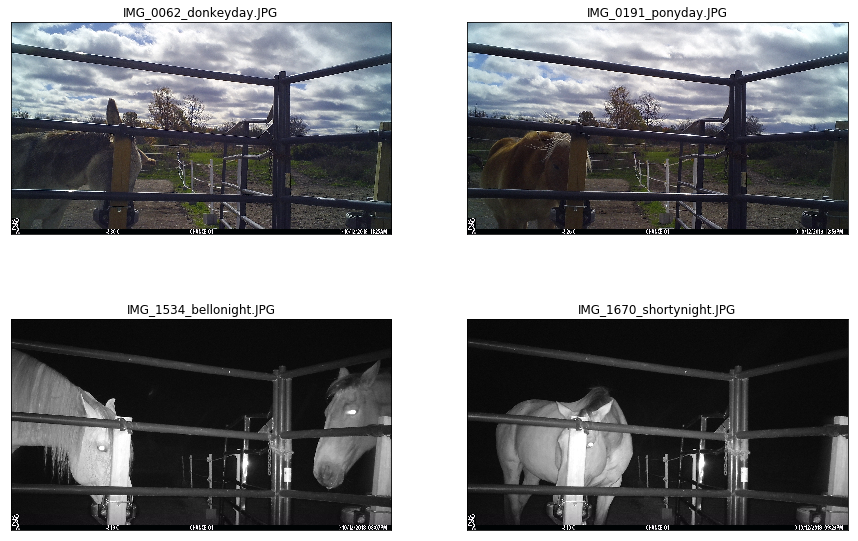

In [83]:
# View the sample webcam images
#
fig, axs = plt.subplots( 2, 2, figsize=( 15, 10 ) )
i = 0
for axis in axs:
    for img in axis:
        img.imshow( mpimg.imread( filenames[i] ) )
        img.set_title( filenames[i] )
        img.set_xticks([])
        img.set_yticks([])
        i = i + 1

## Step 3: Crop and resize the images

In [65]:
def saveSmallImage( filename ):
    full_im     = Image.open( filename )
    cropped_im  = full_im.crop( [50, 50, 1450, 1450 ] )
    small_im    = cropped_im.resize( [ 224, 224 ], resample=Image.LANCZOS )
    sm_filename = re.sub( '\.JPG', '', filename ) + '_sm.jpg'
    small_im.save( sm_filename, format="JPEG" )

In [85]:
for i in range(4):
    saveSmallImage( filenames[i] )

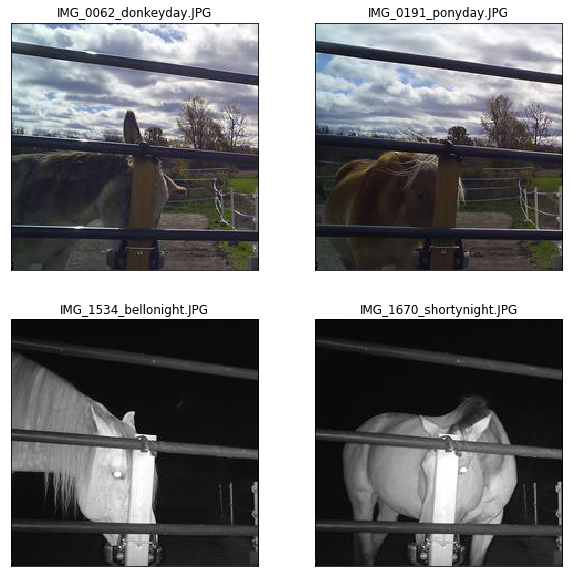

In [88]:
fig, axs = plt.subplots( 2, 2, figsize=( 10, 10 ) )
i = 0
for axis in axs:
    for img in axis:
        img.imshow( mpimg.imread( re.sub( '\.JPG', '', filenames[i] ) + '_sm.jpg' ) )
        img.set_title( filenames[i] )
        img.set_xticks([])
        img.set_yticks([])
        i = i + 1

## Step 4: Classify the cropped and resized images

Use the [Watson Visual Recognition Python client API](https://www.ibm.com/watson/developercloud/visual-recognition/api/v3/python.html?python) to send the cropped and resized images to our trained model for classification.

### Prerequisite
Look up the apikey for the Visual Recognition service instance and the ID of the custom model:
1. From the **Services** menu in Watson Studio (top of the screen) right-click "Watson Services" and then open the link in a new browser tab
2. In the new Watson services tab, click the service instance in the Visual Recognition list
3. In the **Overview** tab, scroll down to the list of your custom models and then click "Copy model ID"
4. In the **Credentials** tab, expand credentials and then copy the apikey

In [49]:
model_id = '' # <-- PASTE YOUR MODEL ID HERE
api_key  = '' # <-- PASTE YOUR APIKEY HERE

In [50]:
def getKey( item ):
    return item["score"]

def getTopClass( results ):
    results_classes = results["images"][0]["classifiers"][0]["classes"]
    sorted_results_classes = sorted( results_classes, key=getKey, reverse=True )
    return sorted_results_classes[0]

def identifyAnimal( filename ):
    visual_recognition = VisualRecognitionV3( version='2018-03-19', iam_apikey=api_key )
    with open( filename, 'rb' ) as image_file:
        results = visual_recognition.classify( image_file, threshold='0', classifier_ids=model_id ).get_result()
        top_class = getTopClass( results )
        return { 'top_class' : top_class, 'results' : results }

In [92]:
filename = filenames[3]
results = identifyAnimal( filename )
print( filename )
print( json.dumps( results, indent=3 ) )

IMG_1670_shortynight.JPG
{
   "top_class": {
      "class": "shortynight",
      "score": 0.857
   },
   "results": {
      "images_processed": 1,
      "images": [
         {
            "classifiers": [
               {
                  "classifier_id": "waterxconsumption_636103270",
                  "classes": [
                     {
                        "class": "belloday",
                        "score": 0.003
                     },
                     {
                        "class": "bellonight",
                        "score": 0.247
                     },
                     {
                        "class": "donkeyday",
                        "score": 0
                     },
                     {
                        "class": "donkeynight",
                        "score": 0.008
                     },
                     {
                        "class": "ponyday",
                        "score": 0.002
                     },
                     {
  

Copyright © 2018 IBM. This notebook and its source code are released under the terms of the MIT License.